<a href="https://colab.research.google.com/github/CarlosSandoval-03/MetNumUN2024II/blob/main/Lab2/csandovalc_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Se especifican las versiones debido a incompatibilidades que mostro el notebook con una instalcion tradicional
!pip install -U fortran-magic==0.8 ipython==7.34.0 numpy==1.25.2 setuptools==67.7.2

**NOTA: DESPUES DE EJECUTAR LA CELDA ANTERIOR, SE DEBE REINICIAR LA SESION DEL NOTEBOOK**

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
#philosophers['Bertrand':'Immanuel'] # TODO: Descomentar, solo es temporal para evitar que Colab detenga el flujo por el error causado

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 31 µs, sys: 3 µs, total: 34 µs
Wall time: 38.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B. Changing len(B) for len(A[0])"""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
# This code must fail
# matmul(a, b) # TODO: Descomentar, solo es temporal para evitar que Colab detenga el flujo por el error causado

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B. Validating the size of the list"""
    if len(B) != len(A[0]):
        raise ValueError("The matrices that were passed to the method do not fulfill the condition that len(A[0]) == len(B)")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
# This code must fail with a specific error message
# matmul(a, b) # TODO: Descomentar, solo es temporal para evitar que Colab detenga el flujo por el error causado

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
# 4x3
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [12, 1, 3]]

# 3x4
b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [3, 4, 5, 6]]

# Ans -> 4x4

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time
matmul(a, b)
# Answer
# [[14, 20, 26, 32], [20, 29, 38, 47], [38, 56, 74, 92], [23, 39, 55, 71]]

CPU times: user 39 µs, sys: 4 µs, total: 43 µs
Wall time: 47.7 µs


[[14, 20, 26, 32], [20, 29, 38, 47], [38, 56, 74, 92], [23, 39, 55, 71]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

1.481120319164785

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.17832403407078523, 0.5239979893506945, 0.40024793953784654],
 [0.3480294357368128, 0.1318701979520458, 0.6339669756033628]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time

sum_total_time_nanosec = 0 # In nanoseconds
num_executions = 10

for _ in range(num_executions):
    # Generate the new random matrix
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)

    time_start = time.process_time_ns()
    matmul(randa, randb)
    time_end = time.process_time_ns()

    sum_total_time_nanosec += (time_end - time_start)

avg_time_sec = (sum_total_time_nanosec / num_executions) / 1e09
print("Average execution time: ", avg_time_sec, "seconds")

Average execution time:  9.7235326255 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

data = [["Python", avg_time_sec]]
df = pd.DataFrame(data, columns=["Language", "Average Time (in Secs)"])
df

,Language,Average Time (in Secs)
0,Python,9.723533


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
sum_total_time_nanosec = 0 # In nanoseconds

for _ in range(num_executions):
    # Generate the new random matrix
    randa = np.array(random_matrix(600, 100))
    randb = np.array(random_matrix(100, 600))

    time_start = time.process_time_ns()
    matmult = np.matmul(randa, randb)
    time_end = time.process_time_ns()

    sum_total_time_nanosec += (time_end - time_start)

avg_time_sec = (sum_total_time_nanosec / num_executions) / 1e09

# Add to dataframe
df.loc[1] = ["NumPy", avg_time_sec]
df

,Language,Average Time (in Secs)
0,Python,9.723533
1,NumPy,0.007416


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.1 s, sys: 99.6 ms, total: 10.2 s
Wall time: 11 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran

subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end subroutine fortran_dot_product

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 8.59 ms, sys: 0 ns, total: 8.59 ms
Wall time: 8.6 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 186 µs, sys: 0 ns, total: 186 µs
Wall time: 193 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
a = [[1, 2],
     [0, 1]]

b = [[20, 3],
     [3, 4]]

# Ans -> 2x2
# [[26, 11], [3, 4]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine fortran_matmul_2dim(A, B, out)
    real, intent(in) :: A(2, 2), B(2, 2)
    real, intent(out) :: out(2, 2)

    !
    out(1, 1) = A(1, 1) * B(1, 1) + A(1, 2) * B(2, 1)
    out(1, 2) = A(1, 1) * B(1, 2) + A(1, 2) * B(2, 2)
    out(2, 1) = A(2, 1) * B(1, 1) + A(2, 2) * B(2, 1)
    out(2, 2) = A(2, 1) * B(1, 2) + A(2, 2) * B(2, 2)
end subroutine fortran_matmul_2dim

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
fortran_matmul_2dim(a, b)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 30.8 µs


array([[26., 11.],
       [ 3.,  4.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine fortran_matmul_large(A, B, out)
    real, intent(in) :: A(600, 100), B(100, 600)
    real, intent(out) :: out(600, 600)
    integer :: i, j, k

    out = 0.0
    do i = 1, 600
        do j = 1, 600
            do k = 1, 100
                out(i, j) = out(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine fortran_matmul_large

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
a = random_matrix(600, 100)
b = random_matrix(100, 600)

res_np = np.matmul(a, b)
res_fortran = fortran_matmul_large(a, b)

# Compare the results
np.allclose(res_np, res_fortran)

True

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
sum_total_time_nanosec = 0 # In nanoseconds

for _ in range(num_executions):
    # Generate the new random matrix
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)

    time_start = time.process_time_ns()
    fortran_matmul_large(randa, randb)
    time_end = time.process_time_ns()

    sum_total_time_nanosec += (time_end - time_start)

avg_time_sec = (sum_total_time_nanosec / num_executions) / 1e09

# Add to dataframe
df.loc[2] = ["Fortran-Magic", avg_time_sec]
df

,Language,Average Time (in Secs)
0,Python,9.723533
1,NumPy,0.007416
2,Fortran-Magic,0.051695


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication_timed.f90

program matrix_multiplication_timed
    integer, parameter :: m = 600, n = 100, p = 600
    real :: A(m, n), B(n, p), out(m, p)
    integer :: i
    real :: start_time, end_time
    real :: total_sum_time = 0.0 ! In Seconds

    integer :: s, j, k
    out = 0.0

    call random_seed()

    do i = 1, 10
        call random_number(A)
        A = A * 100.0
        call random_number(B)
        B = B * 100.0

        call cpu_time(start_time)
        do s = 1, m
            do j = 1, p
                do k = 1, n
                    out(s, j) = out(s, j) + A(s, k) * B(k, j)
                end do
            end do
        end do
        call cpu_time(end_time)

        total_sum_time = total_sum_time + (end_time - start_time)
    end do

    print *, "Average execution time: ", total_sum_time / 10.0, "seconds"
end program matrix_multiplication_timed


Writing matrix_multiplication_timed.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran -o matrix_multiplication_timed matrix_multiplication_timed.f90
!./matrix_multiplication_timed

 Average execution time:   0.220588684     seconds


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
df.loc[3] = ["Fortran-Native", float("0.217571497")]
df

,Language,Average Time (in Secs)
0,Python,9.723533
1,NumPy,0.007416
2,Fortran-Magic,0.051695
3,Fortran-Native,0.217571


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define M 600
#define N 100
#define P 600

void generate_random_matrix(float *matrix, int rows, int cols) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i * cols + j] = (float)(rand() % 100);
        }
    }
}

void matrix_multiply(const float *a, const float *b, float *result) {
    for (int i = 0; i < M; i++) {
        for (int j = 0; j < P; j++) {
            result[i * P + j] = 0.0;
            for (int k = 0; k < N; k++) {
                result[i * P + j] += a[i * N + k] * b[k * P + j];
            }
        }
    }
}

int main() {
    float *a = (float *)malloc(M * N * sizeof(float));
    float *b = (float *)malloc(N * P * sizeof(float));
    float *result = (float *)malloc(M * P * sizeof(float));
    double total_time = 0.0;
    clock_t start, end;

    srand(time(NULL));

    for (int i = 0; i < 10; i++) {
        generate_random_matrix(a, M, N);
        generate_random_matrix(b, N, P);

        start = clock();
        matrix_multiply(a, b, result);
        end = clock();

        total_time += (double)(end - start) / CLOCKS_PER_SEC;
    }

    double average_time = total_time / 10.0;
    printf("Average time per iteration: %.6f seconds\n", average_time);

    // Write results to a file
    FILE *file = fopen("results_c.txt", "w");
    if (file == NULL) {
        perror("Error opening file");
        return 1;
    }
    fprintf(file, "%.6f", average_time);

    free(a);
    free(b);
    free(result);
    fclose(file);
    return 0;
}

Writing matrix_multiplication.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc -Wall -Werror -pedantic -std=c99 -o matrix_multiplication matrix_multiplication.c
!./matrix_multiplication

Average time per iteration: 0.247497 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
c = open("results_c.txt",'r')
result = float(c.readline())
c.close()

df.loc[4] = ["C", result]
df

,Language,Average Time (in Secs)
0,Python,9.723533
1,NumPy,0.007416
2,Fortran-Magic,0.051695
3,Fortran-Native,0.217571
4,C,0.247497


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.cc
#include <iostream>
#include <vector>
#include <fstream>
#include <ctime>
#include <cstdlib>

const int M = 600;
const int N = 100;
const int P = 600;

void generate_random_matrix(std::vector<std::vector<float>>& matrix, int rows, int cols) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = static_cast<float>(rand() % 100);
        }
    }
}

void matrix_multiply(const std::vector<std::vector<float>>& a,
                     const std::vector<std::vector<float>>& b,
                     std::vector<std::vector<float>>& result) {
    for (int i = 0; i < M; i++) {
        for (int j = 0; j < P; j++) {
            result[i][j] = 0.0;
            for (int k = 0; k < N; k++) {
                result[i][j] += a[i][k] * b[k][j];
            }
        }
    }
}

int main() {
    std::vector<std::vector<float>> a(M, std::vector<float>(N));
    std::vector<std::vector<float>> b(N, std::vector<float>(P));
    std::vector<std::vector<float>> result(M, std::vector<float>(P));
    double total_time = 0.0;

    srand(static_cast<unsigned int>(time(nullptr)));

    for (int i = 0; i < 10; i++) {
        generate_random_matrix(a, M, N);
        generate_random_matrix(b, N, P);

        clock_t start = clock();
        matrix_multiply(a, b, result);
        clock_t end = clock();

        total_time += static_cast<double>(end - start) / CLOCKS_PER_SEC;
    }

    double average_time = total_time / 10.0;
    std::cout << "Average time per iteration: " << average_time << " seconds" << std::endl;

    // Write results to a file
    std::ofstream file("results_cpp.txt");
    if (!file) {
        std::cerr << "Error opening file" << std::endl;
        return 1;
    }
    file << average_time << std::endl;

    return 0;
}

Writing matrix_multiplication.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ -Wall -Werror -pedantic -o mat_mult_cpp matrix_multiplication.cc
!./mat_mult_cpp

Average time per iteration: 0.619422 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
cpp = open("results_cpp.txt",'r')
result = float(cpp.readline())
cpp.close()

df.loc[5] = ["C++", result]
df

,Language,Average Time (in Secs)
0,Python,9.723533
1,NumPy,0.007416
2,Fortran-Magic,0.051695
3,Fortran-Native,0.217571
4,C,0.247497
5,C++,0.619422


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatrixMultiplication.java
import java.io.FileWriter;
import java.io.IOException;
import java.util.Random;

public class MatrixMultiplication {
    public static final int M = 600;
    public static final int N = 100;
    public static final int P = 600;

    public static void generateRandomMatrix(float[][] matrix, int rows, int cols) {
        Random random = new Random();
        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = random.nextFloat() * 100;
            }
        }
    }

    public static void matrixMultiply(float[][] a, float[][] b, float[][] result) {
        for (int i = 0; i < M; i++) {
            for (int j = 0; j < P; j++) {
                result[i][j] = 0;
                for (int k = 0; k < N; k++) {
                    result[i][j] += a[i][k] * b[k][j];
                }
            }
        }
    }

    public static void main(String[] args) {
        float[][] a = new float[M][N];
        float[][] b = new float[N][P];
        float[][] result = new float[M][P];
        double totalTime = 0.0;

        for (int i = 0; i < 10; i++) {
            generateRandomMatrix(a, M, N);
            generateRandomMatrix(b, N, P);

            long startTime = System.nanoTime();
            matrixMultiply(a, b, result);
            long endTime = System.nanoTime();

            totalTime += (endTime - startTime) / 1_000_000_000.0;
        }

        double averageTime = totalTime / 10.0;
        System.out.printf("Average time per iteration: %.6f seconds%n", averageTime);

        try (FileWriter writer = new FileWriter("results_java.txt")) {
            writer.write(String.format("%.6f", averageTime));
        } catch (IOException e) {
            System.err.println("Error writing to file: " + e.getMessage());
        }
    }
}

Writing MatrixMultiplication.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatrixMultiplication.java
!java MatrixMultiplication

Average time per iteration: 0.083992 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
java = open("results_java.txt",'r')
result = float(java.readline())
java.close()

df.loc[6] = ["Java", result]
df

,Language,Average Time (in Secs)
0,Python,9.723533
1,NumPy,0.007416
2,Fortran-Magic,0.051695
3,Fortran-Native,0.217571
4,C,0.247497
5,C++,0.619422
6,Java,0.083992


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.js
const fs = require('fs');

const M = 600;
const N = 100;
const P = 600;

function generateRandomMatrix(rows, cols) {
    let matrix = Array.from({ length: rows }, () => Array(cols).fill(0));
    for (let i = 0; i < rows; i++) {
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.random() * 100;
        }
    }
    return matrix;
}

function matrixMultiply(a, b) {
    let result = Array.from({ length: M }, () => Array(P).fill(0));
    for (let i = 0; i < M; i++) {
        for (let j = 0; j < P; j++) {
            for (let k = 0; k < N; k++) {
                result[i][j] += a[i][k] * b[k][j];
            }
        }
    }
    return result;
}

async function main() {
    let totalTime = 0;

    for (let i = 0; i < 10; i++) {
        let a = generateRandomMatrix(M, N);
        let b = generateRandomMatrix(N, P);

        const startTime = process.hrtime();
        matrixMultiply(a, b);
        const endTime = process.hrtime(startTime);

        totalTime += endTime[0] + endTime[1] / 1e9;
    }

    const averageTime = totalTime / 10.0;
    console.log(`Average time per iteration: ${averageTime.toFixed(6)} seconds`);

    fs.writeFile('results_js.txt', averageTime.toFixed(6), (err) => {
        if (err) {
            console.error('Error writing to file:', err);
        }
    });
}

main();

Writing matrix_multiplication.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import subprocess

is_executed_correctly = False
node_file = 'matrix_multiplication.js'
try:
    result = subprocess.run(['node', node_file], capture_output=True, text=True, check=True)
    is_executed_correctly = True
    print("Output from Node.js script:")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("Error executing Node.js script:")
    print(e.stderr)

Output from Node.js script:
Average time per iteration: 0.456087 seconds



**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
if is_executed_correctly:
    js = open("results_js.txt",'r')
    result = float(js.readline())
    js.close()

    df.loc[7] = ["Javascript", result]

df

,Language,Average Time (in Secs)
0,Python,9.723533
1,NumPy,0.007416
2,Fortran-Magic,0.051695
3,Fortran-Native,0.217571
4,C,0.247497
5,C++,0.619422
6,Java,0.083992
7,Javascript,0.456087


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
sorted_df = df.sort_values(by='Average Time (in Secs)')
min_time = sorted_df.iloc[0]['Average Time (in Secs)']

print("El tiempo mínimo promedio de ejecución es:", min_time)

El tiempo mínimo promedio de ejecución es: 0.007416286


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
# Adding the speed factor columne to the data frame
df['Speed Factor'] = df['Average Time (in Secs)'] / min_time
df

,Language,Average Time (in Secs),Speed Factor
0,Python,9.723533,1311.105400
1,NumPy,0.007416,1.000000
2,Fortran-Magic,0.051695,6.970430
3,Fortran-Native,0.217571,29.336988
4,C,0.247497,33.372095
5,C++,0.619422,83.521860
6,Java,0.083992,11.325345
7,Javascript,0.456087,61.498033


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df = df.sort_values(by='Average Time (in Secs)')
df

,Language,Average Time (in Secs),Speed Factor
1,NumPy,0.007416,1.000000
2,Fortran-Magic,0.051695,6.970430
6,Java,0.083992,11.325345
3,Fortran-Native,0.217571,29.336988
4,C,0.247497,33.372095
7,Javascript,0.456087,61.498033
5,C++,0.619422,83.521860
0,Python,9.723533,1311.105400


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.51 ms, sys: 6 µs, total: 1.51 ms
Wall time: 2.17 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 294 µs, total: 294 µs
Wall time: 186 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 384 µs, total: 384 µs
Wall time: 197 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
# data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
#data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0375488501646515

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [ ]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [ ]:
# As does boolean masking.
s.loc[s > 2]

,0
c,3
d,4
e,5


In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [ ]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

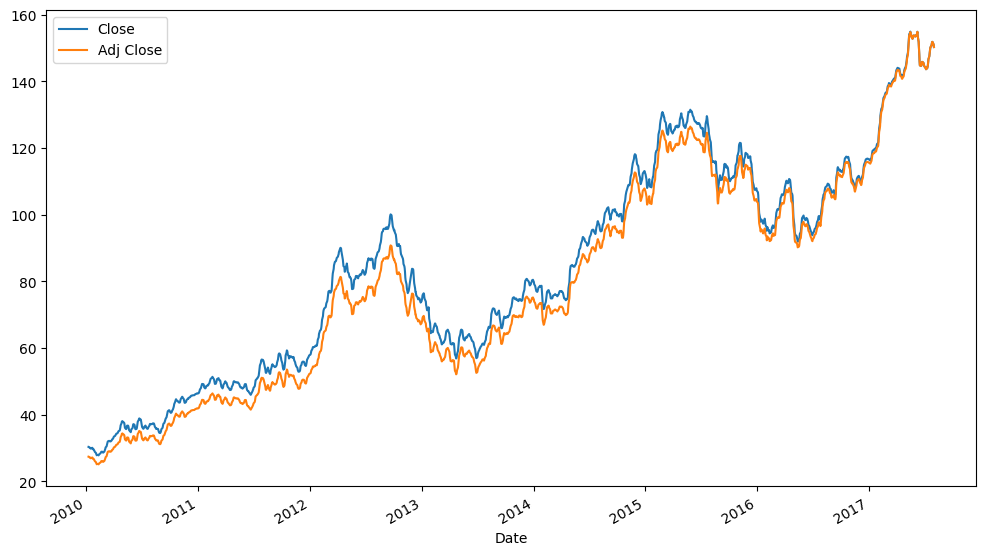

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

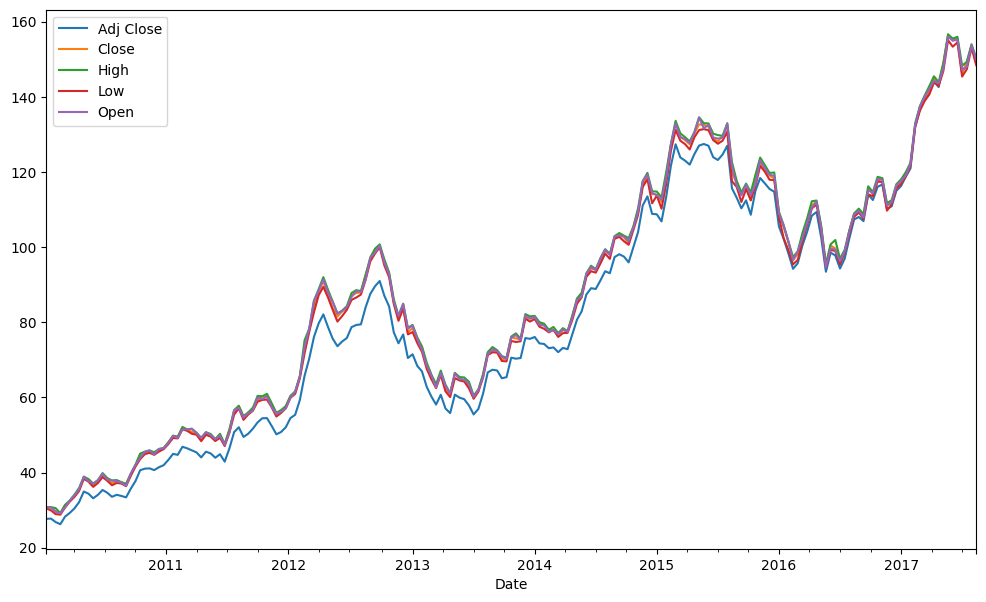

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

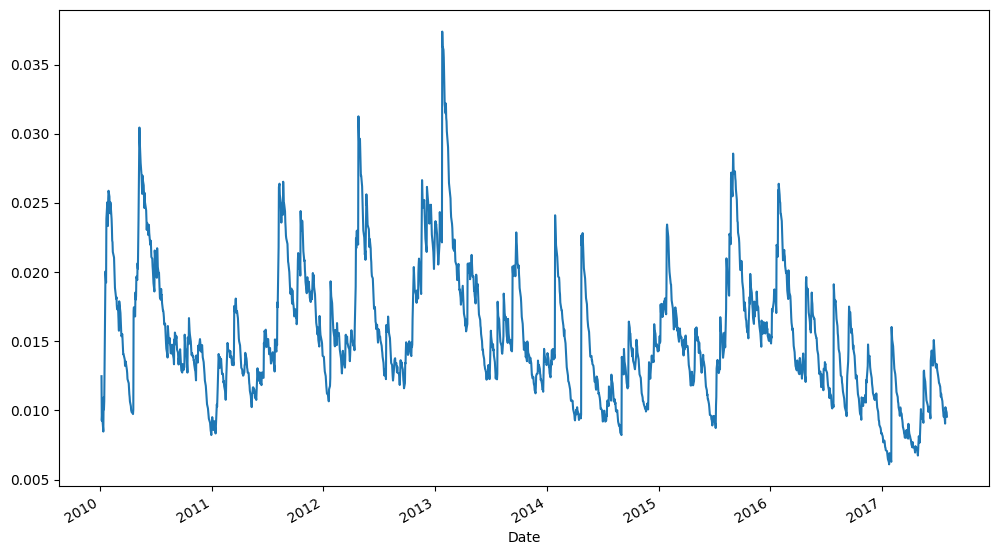

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
#from demos.avocados import read_avocadata
avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-150-74fdf899ad9d>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Variety'].replace(


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

,0
Date,"datetime64[ns, UTC]"
Region,object
Variety,object
Organic,bool
Number of Stores,int64
Weighted Avg Price,float64
Low Price,float64
High Price,float64


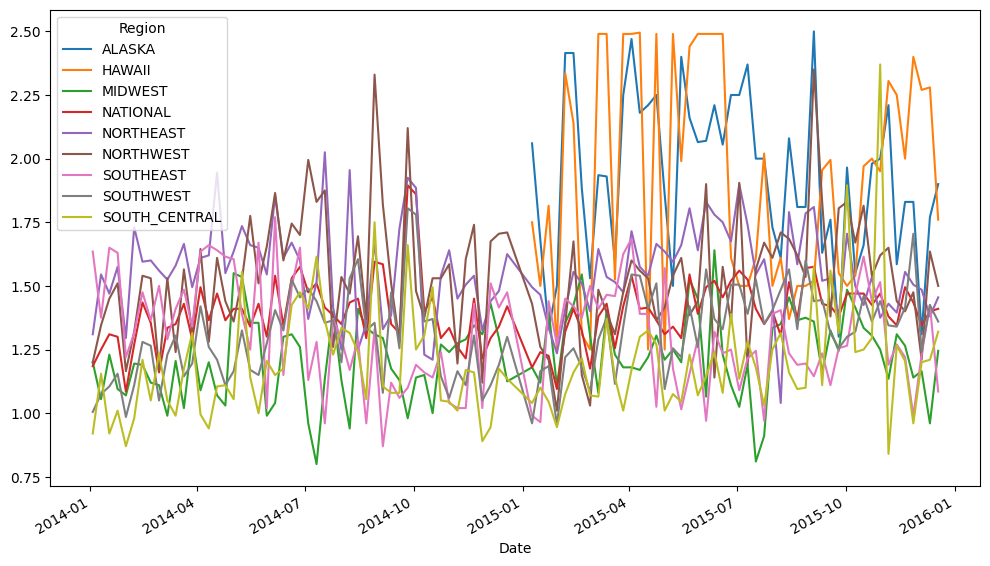

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

<ipython-input-156-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


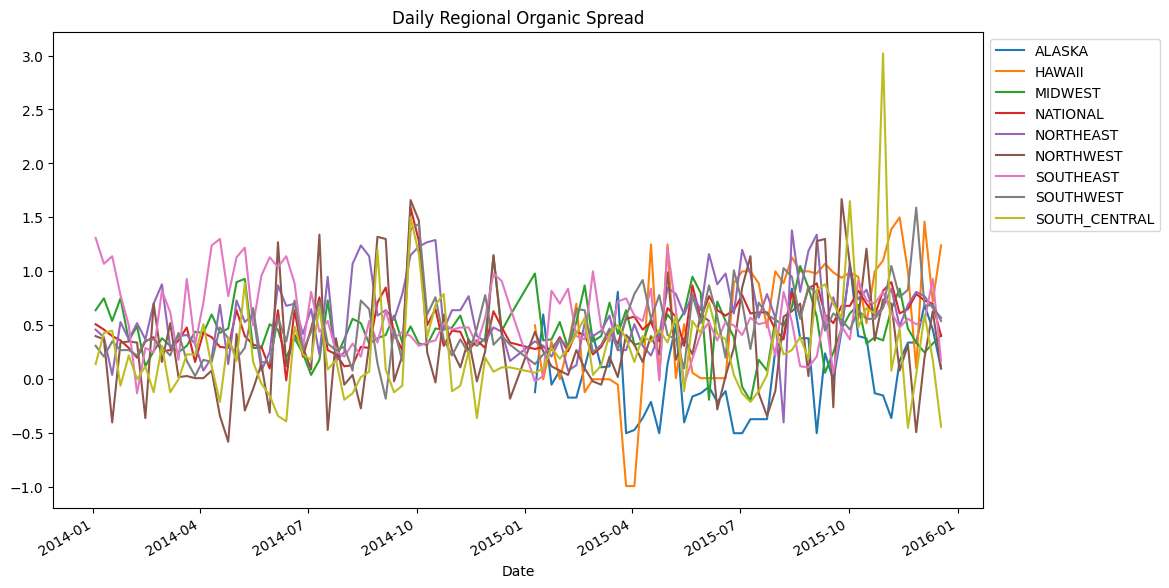

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

<ipython-input-156-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


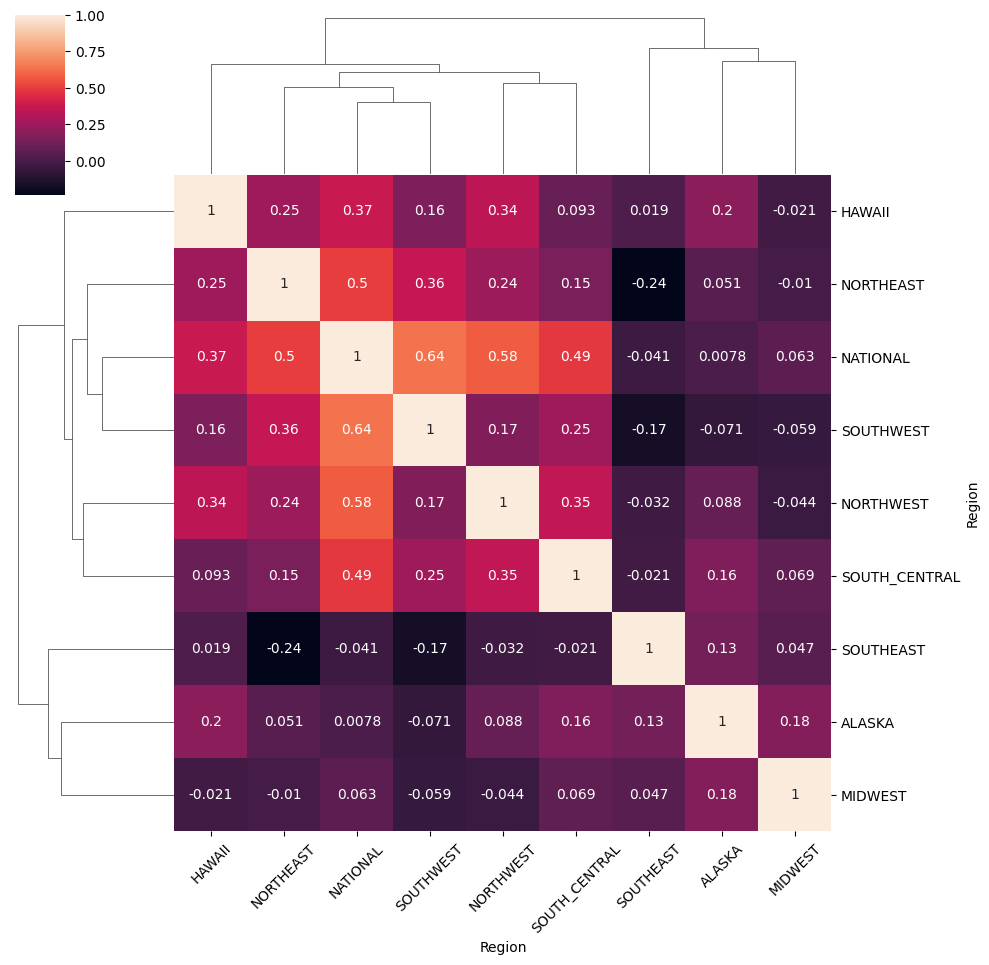

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

## Ejemplo propio

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

url = 'https://www.datos.gov.co/resource/xfif-myr2.json'
response = requests.get(url)
data_json = response.json()

data = pd.json_normalize(data_json)
print(data.info())
print(data.describe(include='all'))

# Procesar, limpiar y eliminar duplicados
data['fechainscripcionbeneficiario'] = pd.to_datetime(data['fechainscripcionbeneficiario'], errors='coerce')
data['fechaultimobeneficioasignado'] = pd.to_datetime(data['fechaultimobeneficioasignado'], errors='coerce')

data.replace({"ND": np.nan}, inplace=True)

for column in data.select_dtypes(include=['object']).columns:
    print(f"Valores únicos en '{column}':\n", data[column].unique(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   bancarizado                        978 non-null    object
 1   codigodepartamentoatencion         1000 non-null   object
 2   codigomunicipioatencion            1000 non-null   object
 3   discapacidad                       1000 non-null   object
 4   estadobeneficiario                 1000 non-null   object
 5   etnia                              1000 non-null   object
 6   fechainscripcionbeneficiario       1000 non-null   object
 7   genero                             1000 non-null   object
 8   nivelescolaridad                   1000 non-null   object
 9   nombredepartamentoatencion         1000 non-null   object
 10  nombremunicipioatencion            1000 non-null   object
 11  pais                               1000 non-null   object
 12  tipoasi

<ipython-input-169-e699e067bef5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='estadobeneficiario', palette='viridis')


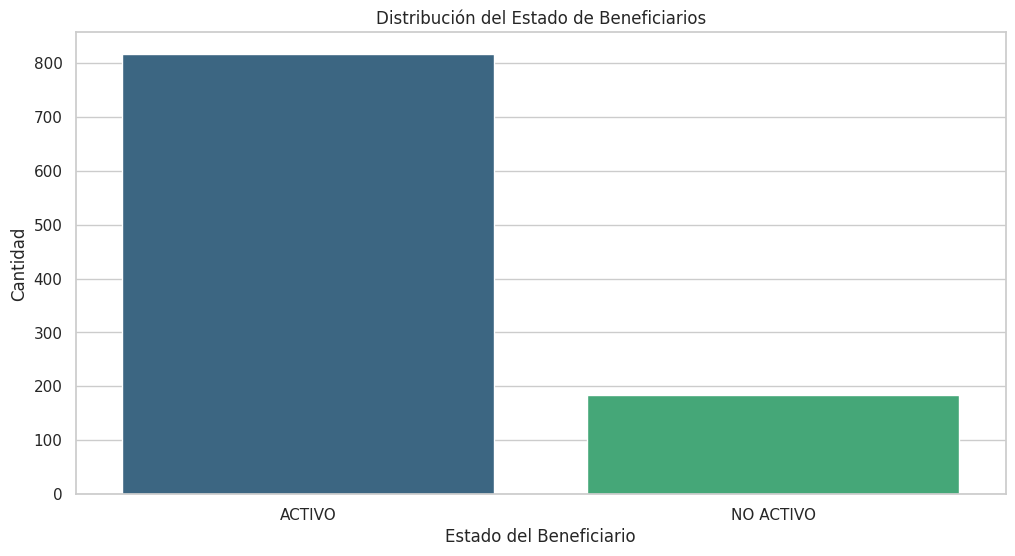

In [ ]:
# Estado beneficiarios
plt.figure()
sns.countplot(data=data, x='estadobeneficiario', palette='viridis')
plt.title('Distribución del Estado de Beneficiarios')
plt.xlabel('Estado del Beneficiario')
plt.ylabel('Cantidad')
plt.show()

<ipython-input-170-129ad928c6fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='genero', palette='pastel')


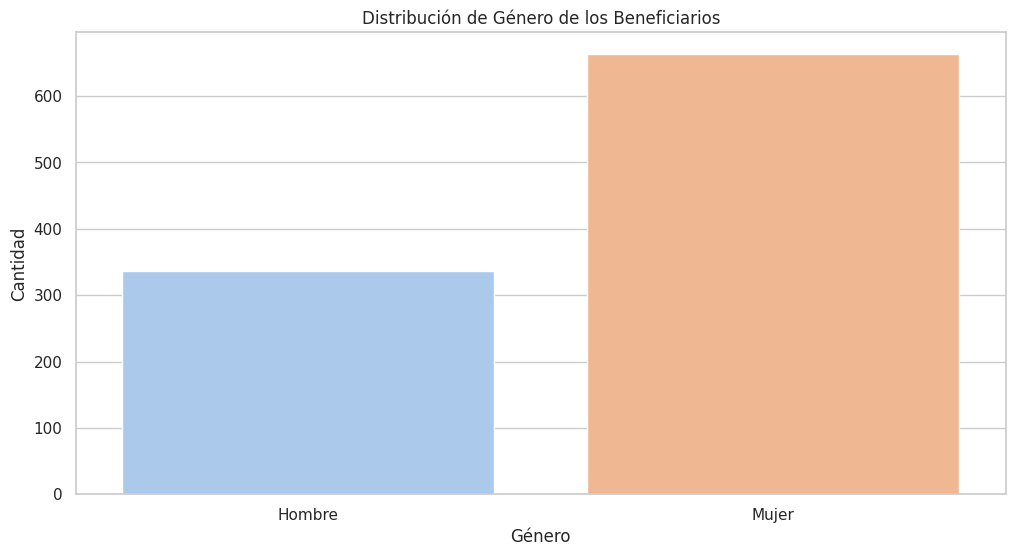

In [ ]:
# Distribucion genero
plt.figure()
sns.countplot(data=data, x='genero', palette='pastel')
plt.title('Distribución de Género de los Beneficiarios')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

<ipython-input-191-eca6f47b9f88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='genero', y='rangobeneficioconsolidadoasignado', palette='muted')


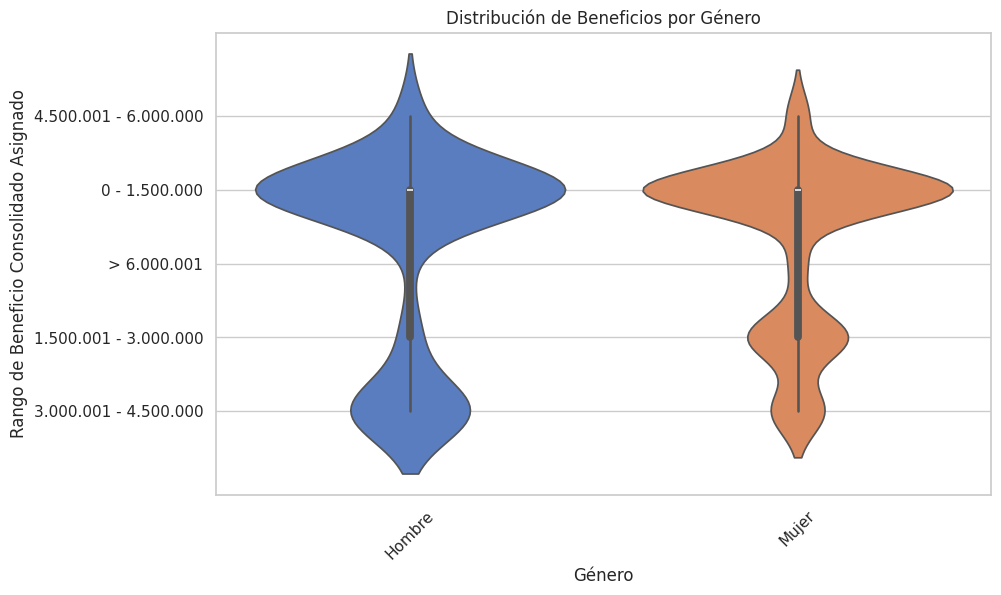

In [191]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='genero', y='rangobeneficioconsolidadoasignado', palette='muted')
plt.title('Distribución de Beneficios por Género')
plt.xlabel('Género')
plt.ylabel('Rango de Beneficio Consolidado Asignado')
plt.xticks(rotation=45)
plt.show()

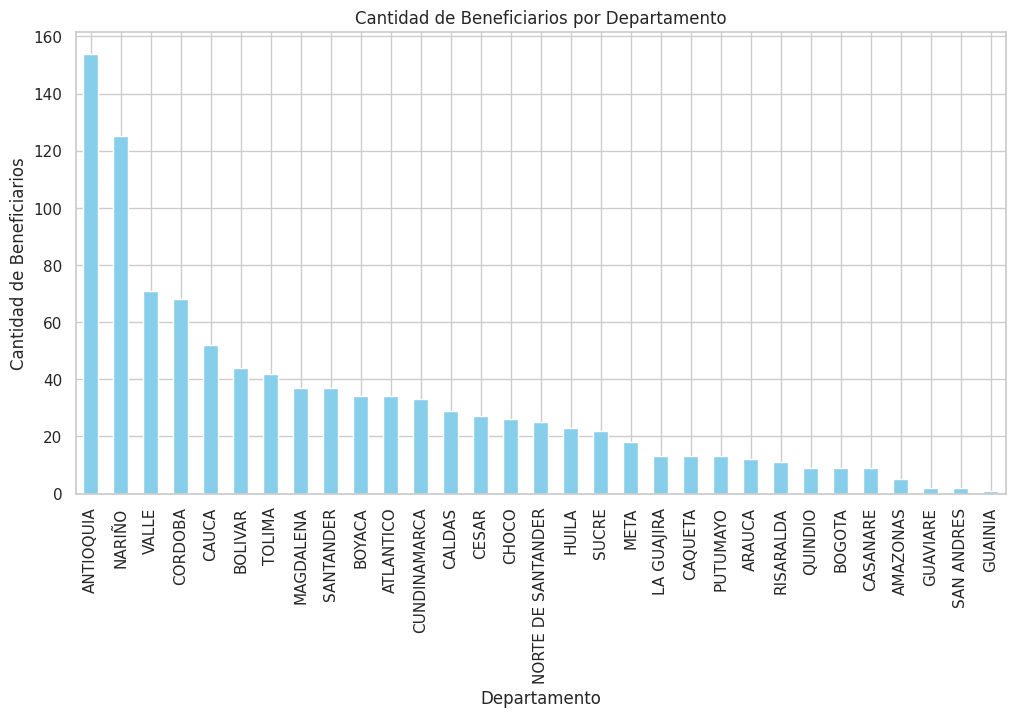

In [ ]:
# Distribución de Beneficiarios por Departamento
plt.figure()
data['nombredepartamentoatencion'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Beneficiarios por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Beneficiarios')
plt.xticks(rotation=90)
plt.show()

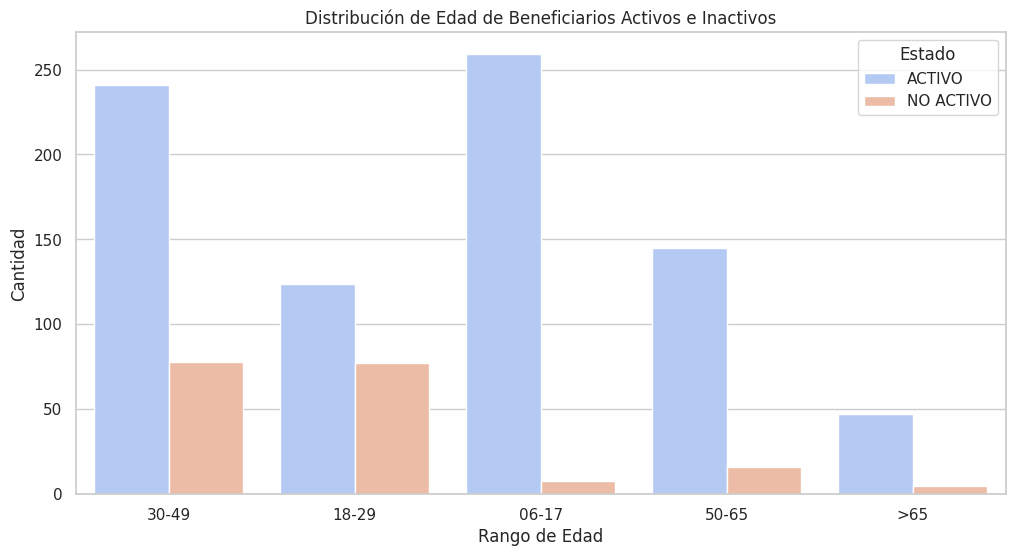

In [ ]:
# Rango de Edad de los Beneficiarios Activos e Inactivos
plt.figure()
sns.countplot(data=data, x='rangoedad', hue='estadobeneficiario', palette='coolwarm')
plt.title('Distribución de Edad de Beneficiarios Activos e Inactivos')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad')
plt.legend(title='Estado')
plt.show()

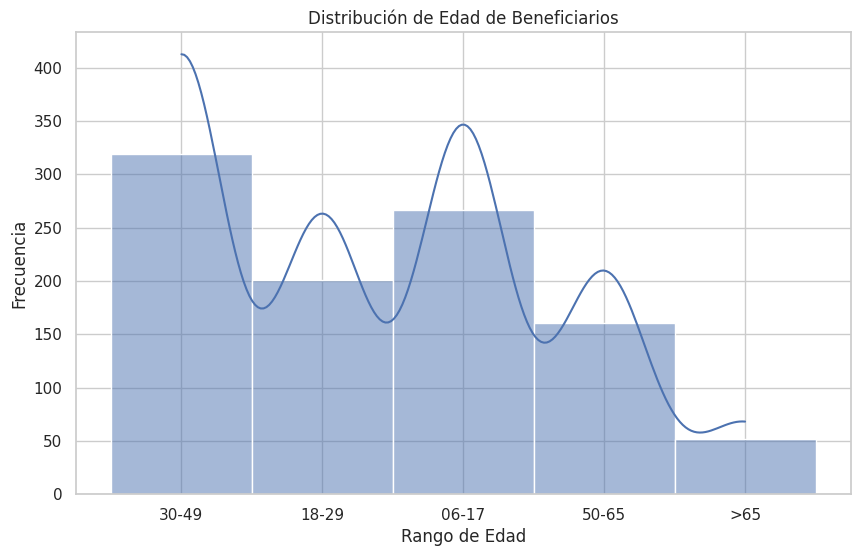

In [189]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='rangoedad', bins=10, kde=True)
plt.title('Distribución de Edad de Beneficiarios')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.show()

<ipython-input-186-934b2254ac4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['estadobeneficiario'] == 'ACTIVO'], x='rangobeneficioconsolidadoasignado', palette='plasma')


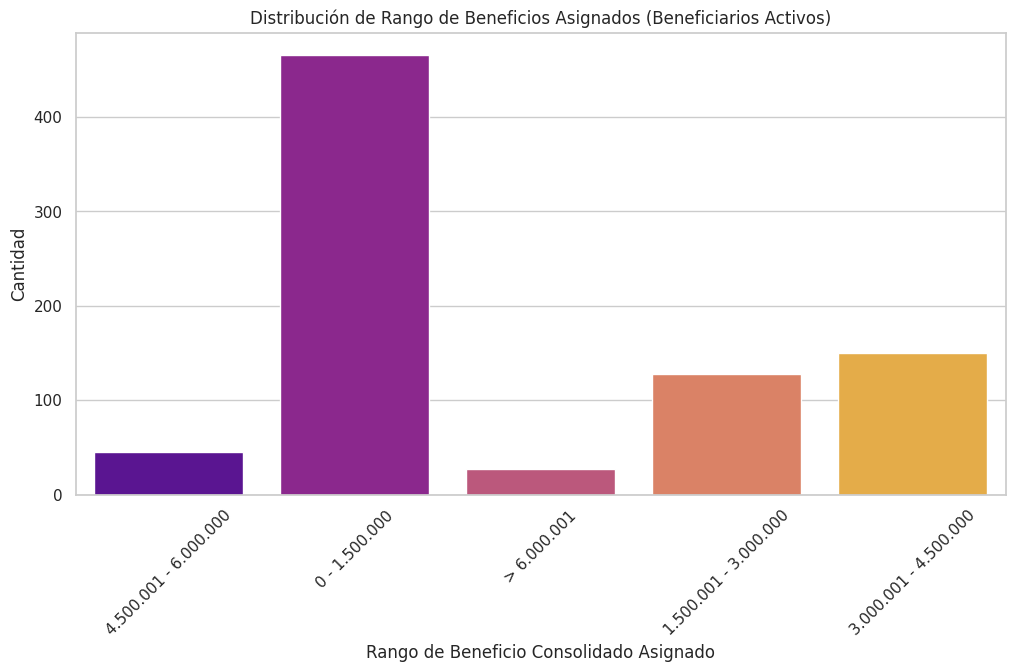

In [186]:
# Rango economico de los beneficios
plt.figure()
sns.countplot(data=data[data['estadobeneficiario'] == 'ACTIVO'], x='rangobeneficioconsolidadoasignado', palette='plasma')
plt.title('Distribución de Rango de Beneficios Asignados (Beneficiarios Activos)')
plt.xlabel('Rango de Beneficio Consolidado Asignado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

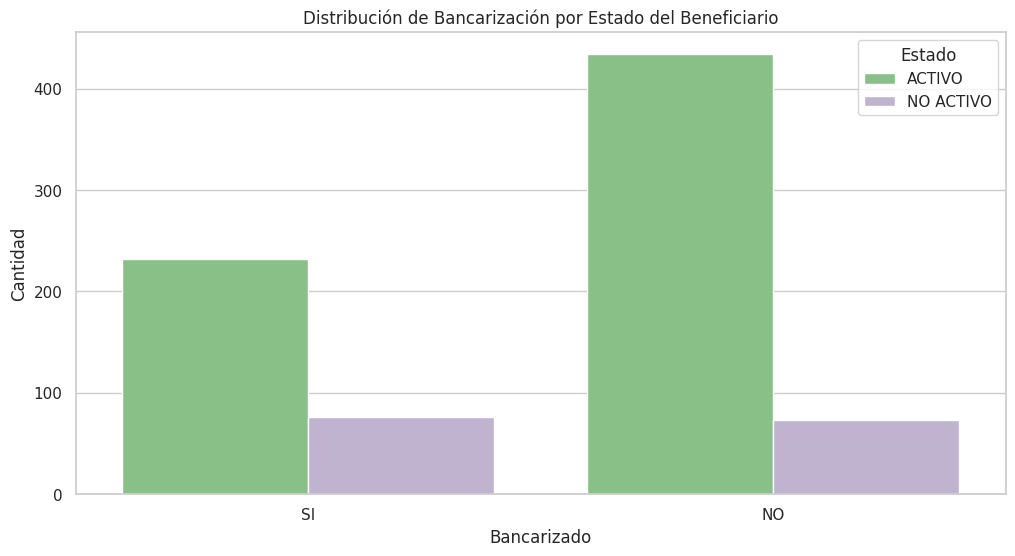

In [ ]:
# Distribución de Bancarización por Estado del Beneficiario
plt.figure()
sns.countplot(data=data, x='bancarizado', hue='estadobeneficiario', palette='Accent')
plt.title('Distribución de Bancarización por Estado del Beneficiario')
plt.xlabel('Bancarizado')
plt.ylabel('Cantidad')
plt.legend(title='Estado')
plt.show()

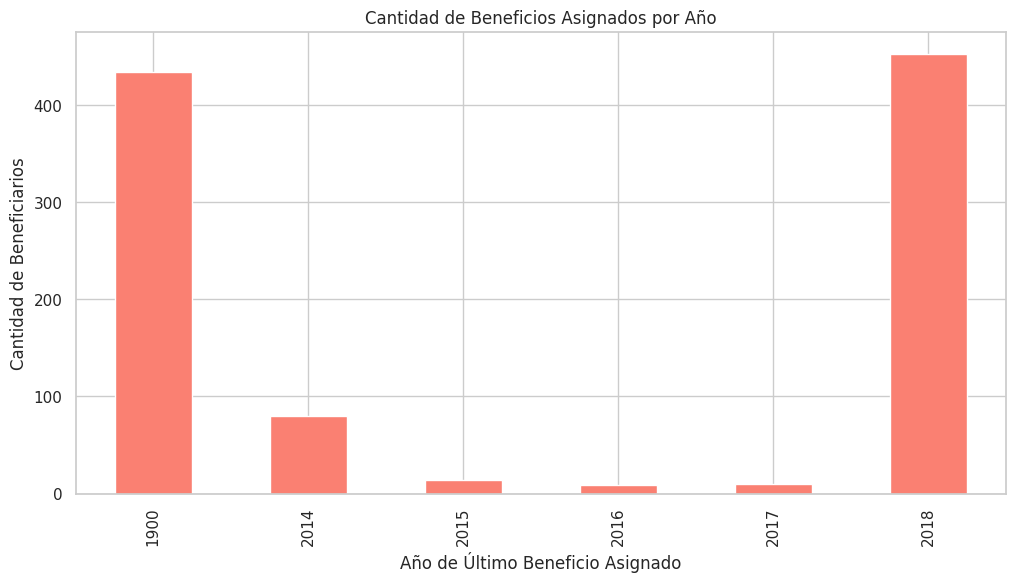

In [179]:
# Tiempos de Beneficio Asignado por Año
plt.figure()
data['fechaultimobeneficioasignado'].dropna().dt.year.value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Cantidad de Beneficios Asignados por Año')
plt.xlabel('Año de Último Beneficio Asignado')
plt.ylabel('Cantidad de Beneficiarios')
plt.show()

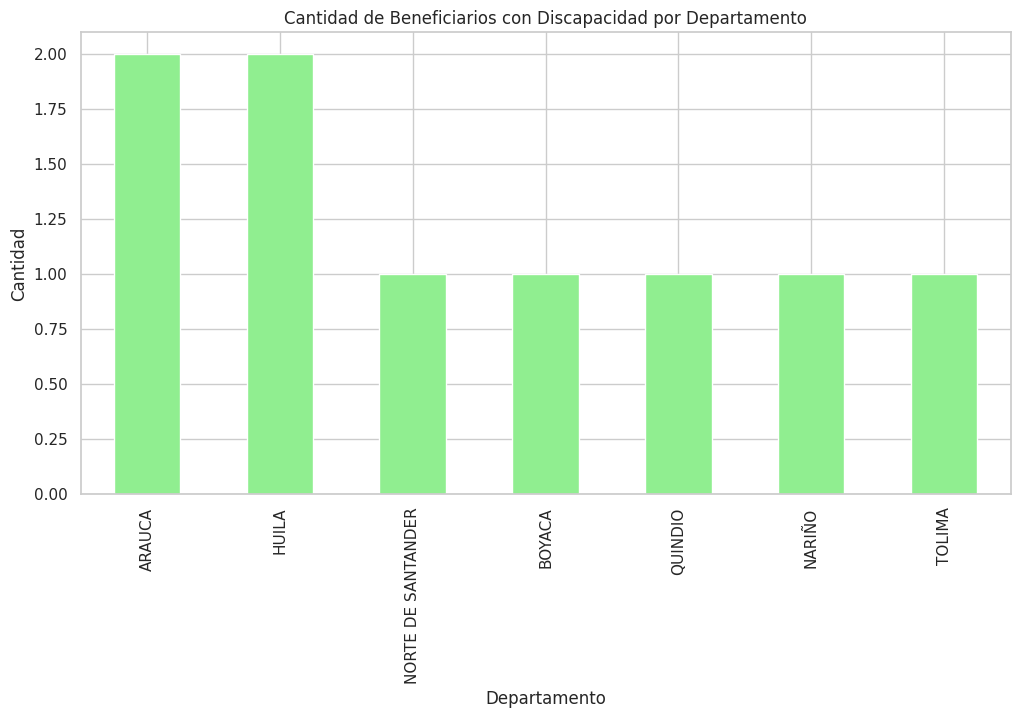

In [180]:
# Cantidad de Beneficiarios con Discapacidad por Departamento
plt.figure()
discapacidad_data = data[data['discapacidad'] == 'SI']
discapacidad_data['nombredepartamentoatencion'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Cantidad de Beneficiarios con Discapacidad por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

<ipython-input-181-d0591c169ccb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='tipopoblacion', order=data['tipopoblacion'].value_counts().index, palette='magma')


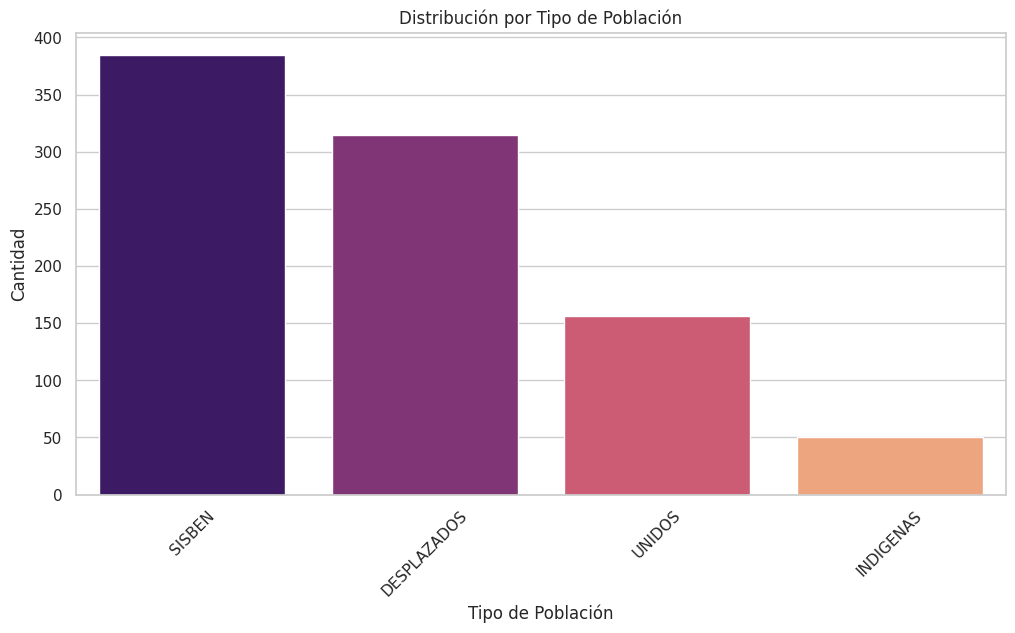

In [181]:
# Distribución por Tipo de Población
plt.figure()
sns.countplot(data=data, x='tipopoblacion', order=data['tipopoblacion'].value_counts().index, palette='magma')
plt.title('Distribución por Tipo de Población')
plt.xlabel('Tipo de Población')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

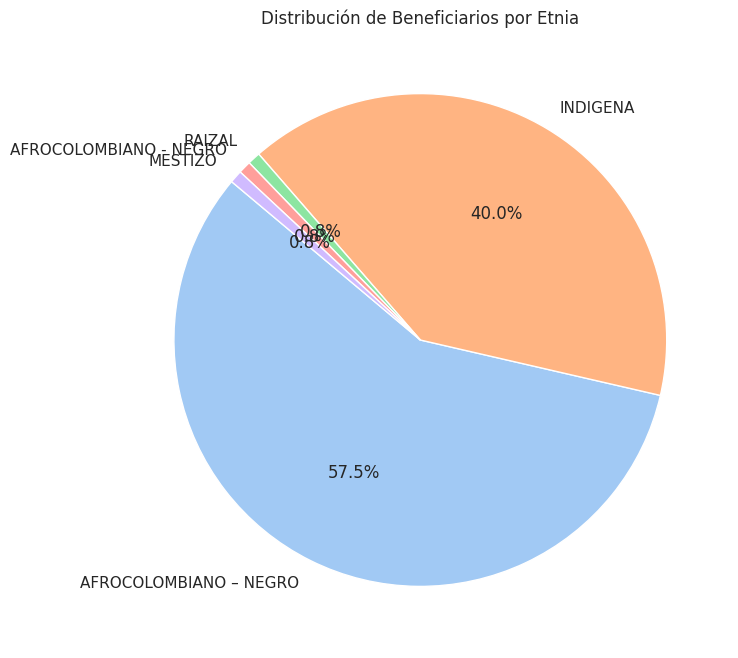

In [194]:
etnia_counts = data['etnia'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(etnia_counts, labels=etnia_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Beneficiarios por Etnia')
plt.show()

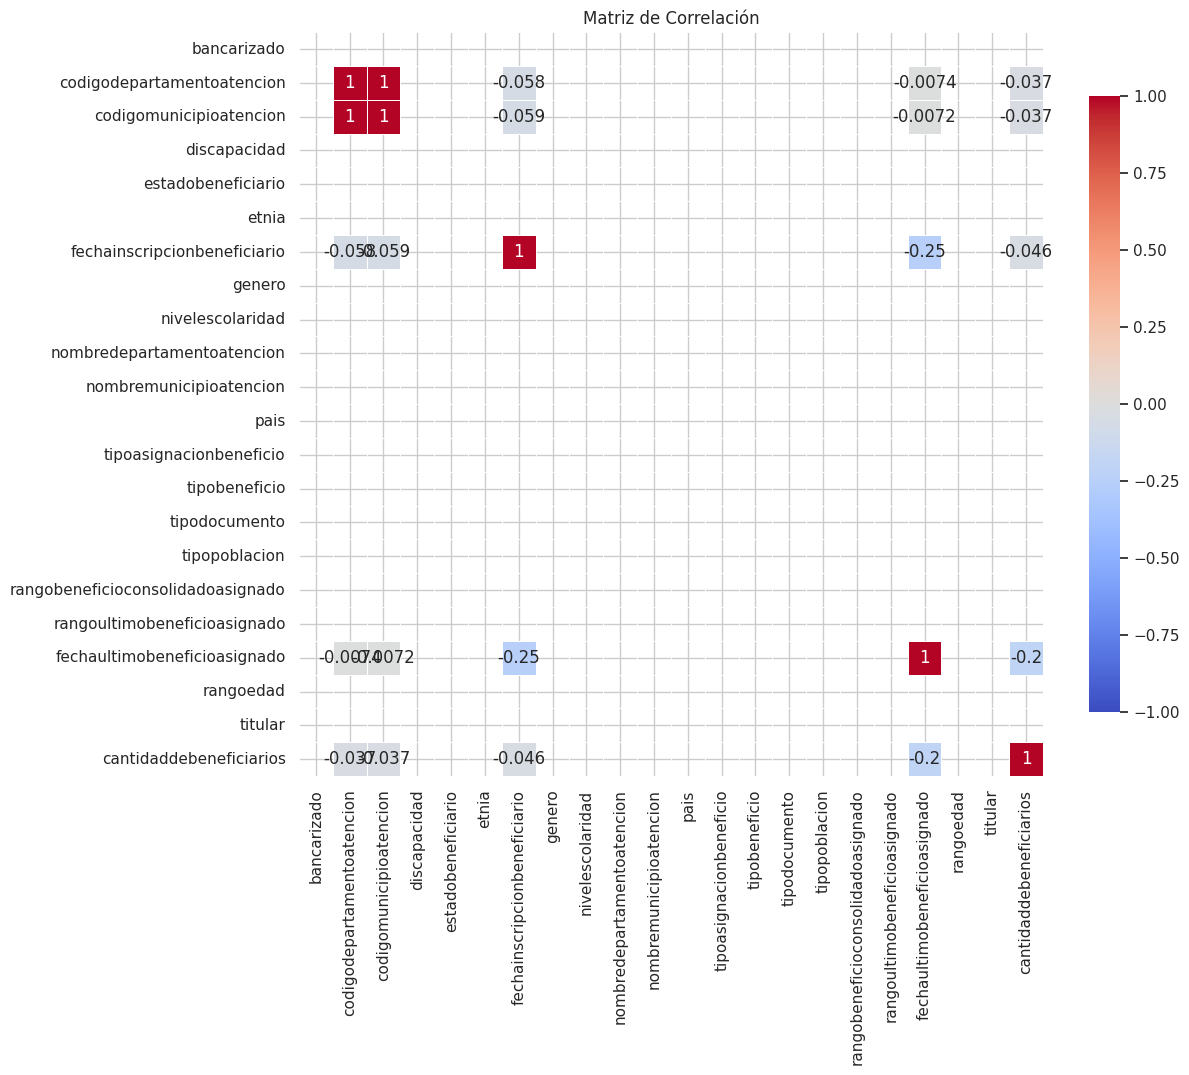

In [187]:
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = data_numeric.corr()

# Crear el mapa de calor de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,             # Muestra los valores de correlación en cada celda
    cmap="coolwarm",        # Colores de degradado para valores positivos y negativos
    vmin=-1, vmax=1,        # Rango de valores de correlación
    square=True,            # Celdas cuadradas para una mejor presentación
    linewidths=0.5,         # Espacio entre las celdas
    cbar_kws={"shrink": 0.8} # Ajusta el tamaño de la barra de color
)
plt.title("Matriz de Correlación")
plt.show()